In [ ]:
#IMPORTING DEPENDENCIES
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [ ]:
#LOADING DATA
from google.colab import files
files.upload()

In [ ]:
#Get and store the data
#store the data
df = pd.read_csv('ETH-USD.csv')
df=df.set_index(pd.DatetimeIndex(df['Date']).values)
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-12-14,14-12-20,589.782471,590.492981,577.118408,586.011169,586.011169,8125837102
2020-12-15,15-12-20,586.021790,596.247742,580.628784,589.355591,589.355591,9326645840
2020-12-16,16-12-20,589.378662,636.640320,582.039124,636.181824,636.181824,15817248373
2020-12-17,17-12-20,636.154175,673.834229,628.749390,642.868958,642.868958,25479532147
2020-12-18,18-12-20,642.916992,662.699097,632.356079,654.811951,654.811951,15756303983
...,...,...,...,...,...,...,...
2021-10-12,10-12-21,4113.588379,4227.111816,3897.767578,3908.496094,3908.496094,28014595631
2021-11-12,11-12-21,3909.667725,4095.648438,3846.054443,4084.452393,4084.452393,19131502454
2021-12-12,12-12-21,4084.811279,4173.608887,3993.055908,4134.453125,4134.453125,14057603914
2021-12-13,13-12-21,4136.359863,4145.955078,3680.609131,3784.226807,3784.226807,23999841386


In [ ]:
#create a variable for prediction 'n' days out into the future
projection = 15
#create a new column called prediction
df['Prediction'] = df[['Close']].shift(-projection)
#Show the data set
df

In [ ]:
#creating the independent data set "X"
X = np.array(df[['Close']])
#remove the last 15 rows
X = X[:-projection]
print(X)

In [ ]:
#Creating dependent data  set "Y"
y = df['Prediction'].values
y = y[:-projection]
print(y)

In [ ]:
#splitting data into 85% training and 15% testing data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .20)


In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [ ]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr accuracy:', svr_rbf_confidence)


svr accuracy: 0.7594657534023841


In [ ]:
svm_prediction= svr_rbf.predict(x_test)
print(svm_prediction)

[4060.68695466 4196.94914684 3579.63924418 3242.31097076 1515.46922367
 2282.80222336 2661.81064586 3445.62767468 4014.02773462 2270.86426821
 2155.66915539 3566.99863029 3437.41833971 1968.02197887 3902.86474786
 3248.76549471 3623.064046   4190.22037631 4281.23951154 2349.79958463
 2295.38264013 4170.86895256 2724.94396266 1361.7447964  3313.19276923
 1162.50569251 3243.62057199 2034.99000757 2495.40818424 3925.13717162
 4332.7193795  3308.97399676 1435.07254793 2395.64265836 2668.08580486
 2437.38584481 3954.8345671  1818.05728176 3935.6880338  2079.11186067
 3419.90331914 4203.96666422 1160.85019925 3246.99390369 1818.17988991
 1807.40780042 4171.19069539 4208.08713665 1807.21381563 3790.68020167
 2813.09239783 1086.62619033 1878.69306488 2147.64368286 2212.10816044
 1789.83274226 2385.32711636 1861.60340392 4334.52866801 1766.97405365
 2540.32816667 2365.39860847 1384.5099883  2696.90463977 3652.27822995
 4199.65935218 2033.20891282 4060.37322079 2132.80207713 3525.03724931
 1544.

In [ ]:
#actual values
print(y_test)

[2419.90625  4088.457764 3862.634766 3224.374268 1382.522827 2120.026367
 3164.245117 3615.282715 4521.581055 1654.741577 1541.914307 3545.354004
 3380.070068 1570.203979 4324.626953 2807.296631 2295.705566 4409.931152
 4626.358887 2191.373779 2237.136963 4084.452393 2353.768799 1382.274048
 3952.133545 1130.73938  3426.394287 1868.048828 3020.089844 3307.516113
 4134.453125 3877.650879 1376.115479 2189.21875  3484.729004 2517.438721
 3432.018311 1848.458252 2764.431152 1564.707642 3100.325439 4298.306641
 1043.43457  2231.733154 1791.702271 1960.164795 4294.453613 4631.479004
 2088.57373  4340.763672 4079.057373 1207.112183 2139.353271 1459.973145
 2324.679443 1660.909546 2233.366699 1935.601074 4511.302246 1744.243408
 1895.552124 3157.23877  1298.101807 1829.239258 3930.257324 4269.73291
 1575.853149 2390.30542  1678.650146 3211.505859 1314.986206]


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

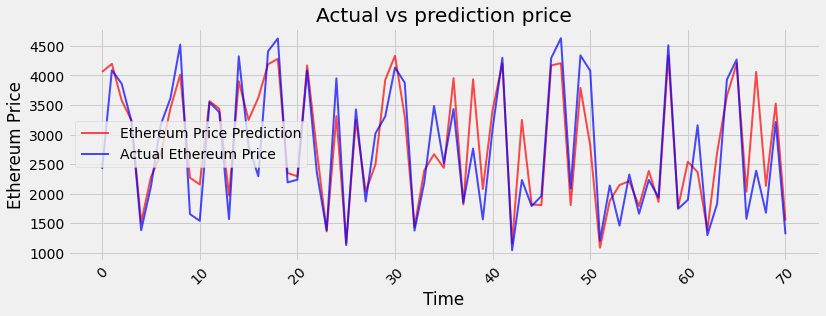

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, color = 'red', label = 'Ethereum Price Prediction', lw=2, alpha=.7)
plt.plot(y_test, color = 'blue', label = 'Actual Ethereum Price', lw=2, alpha=.7)
plt.title('Actual vs prediction price')
plt.xlabel('Time')
plt.ylabel('Ethereum Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()